# (Bike Trip Data Exploration)
## by (Abdullah ALShayie)

## Preliminary Wrangling

> This document explores a dataset containing duration time, member age and gender type for 174952 trips.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt

%matplotlib inline

> After import libraries, Start Exploration by gather, assess and clean

In [2]:
# Load ind the dataset into a pandas dataframe then print statistics
biketrip = pd.read_csv("fordgobike-tripdata.csv")

In [3]:
# overview of data shape and composition
biketrip.shape

(183412, 16)

In [4]:
biketrip.info()
biketrip.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [5]:
biketrip.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
# Clean null values
biketrip_clean = biketrip.copy()

In [7]:
biketrip_clean = biketrip_clean.dropna(how = 'any')

In [8]:
biketrip_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [9]:
biketrip_clean['member_birth_year'] = biketrip_clean.member_birth_year.astype(int)

In [10]:
biketrip_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  int64  
 14  memb

In [11]:
# calculate member age, by member birth year min BikeTrip year - 2019
biketrip_clean['member_age'] = 2019 - biketrip_clean['member_birth_year']

In [12]:
# calculate duration minute, by duration sec / 60
biketrip_clean['duration_minute'] = biketrip_clean['duration_sec'] // 60

In [13]:
# change type of duration minute to float
biketrip_clean['duration_minute'] = biketrip_clean.duration_minute.astype(float)

In [14]:
biketrip_clean.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,duration_minute
144946,484,2019-02-07 10:32:34.8720,2019-02-07 10:40:39.5470,214.0,Market St at Brockhurst St,37.823321,-122.275732,176.0,MacArthur BART Station,37.828410,-122.266315,5170,Subscriber,1992,Other,No,27,8.0
127736,527,2019-02-10 15:03:27.9970,2019-02-10 15:12:15.5680,175.0,49th St at Telegraph Ave,37.835946,-122.262366,207.0,Broadway at Coronado Ave,37.835788,-122.251621,511,Subscriber,1986,Female,No,33,8.0
40198,942,2019-02-22 21:45:48.3530,2019-02-22 22:01:30.7080,365.0,Turk St at Fillmore St,37.780450,-122.431946,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,5255,Subscriber,2000,Male,No,19,15.0
54850,284,2019-02-21 11:51:29.1420,2019-02-21 11:56:14.1160,385.0,Woolsey St at Sacramento St,37.850578,-122.278175,271.0,San Pablo Park,37.855783,-122.283127,3726,Subscriber,1985,Male,No,34,4.0
87420,499,2019-02-17 08:56:55.2850,2019-02-17 09:05:14.5630,125.0,20th St at Bryant St,37.759200,-122.409851,58.0,Market St at 10th St,37.776619,-122.417385,6209,Subscriber,1996,Male,No,23,8.0
112215,240,2019-02-12 16:01:14.9390,2019-02-12 16:05:15.6110,41.0,Golden Gate Ave at Polk St,37.781270,-122.418740,74.0,Laguna St at Hayes St,37.776435,-122.426244,4994,Subscriber,1993,Male,No,26,4.0
156035,212,2019-02-06 08:24:25.9590,2019-02-06 08:27:58.9140,58.0,Market St at 10th St,37.776619,-122.417385,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,3066,Subscriber,1993,Female,No,26,3.0
31987,530,2019-02-24 15:25:53.6740,2019-02-24 15:34:44.3350,174.0,Shattuck Ave at 51st St,37.836801,-122.264004,273.0,Fulton St at Ashby Ave,37.855574,-122.263565,1394,Subscriber,1979,Male,No,40,8.0
98331,980,2019-02-15 07:47:25.8870,2019-02-15 08:03:46.6120,131.0,22nd St at Dolores St,37.755000,-122.425728,130.0,22nd St Caltrain Station,37.757288,-122.392051,5569,Subscriber,1995,Male,No,24,16.0
154741,176,2019-02-06 09:30:19.4700,2019-02-06 09:33:15.9420,25.0,Howard St at 2nd St,37.787522,-122.397405,36.0,Folsom St at 3rd St,37.783830,-122.398870,5422,Subscriber,1982,Male,No,37,2.0


In [15]:
# Save dataframe
biketrip_clean.to_csv('biketrip.csv', encoding = 'utf-8')

In [16]:
# Read dataframe
biketrip = pd.read_csv('biketrip.csv')

In [17]:
biketrip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               174952 non-null  int64  
 1   duration_sec             174952 non-null  int64  
 2   start_time               174952 non-null  object 
 3   end_time                 174952 non-null  object 
 4   start_station_id         174952 non-null  float64
 5   start_station_name       174952 non-null  object 
 6   start_station_latitude   174952 non-null  float64
 7   start_station_longitude  174952 non-null  float64
 8   end_station_id           174952 non-null  float64
 9   end_station_name         174952 non-null  object 
 10  end_station_latitude     174952 non-null  float64
 11  end_station_longitude    174952 non-null  float64
 12  bike_id                  174952 non-null  int64  
 13  user_type                174952 non-null  object 
 14  memb

In [18]:
biketrip.sample(10)

,Unnamed: 0,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,duration_minute
54727,57241,1219,2019-02-21 08:14:03.1980,2019-02-21 08:34:22.6380,355.0,23rd St at Tennessee St,37.755367,-122.388795,14.0,Clay St at Battery St,37.795001,-122.399970,5152,Customer,1960,Other,No,59,20.0
143507,150434,2345,2019-02-06 17:38:55.5230,2019-02-06 18:18:01.3500,66.0,3rd St at Townsend St,37.778742,-122.392741,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4933,Subscriber,1995,Male,No,24,39.0
13365,13894,206,2019-02-27 14:25:41.3190,2019-02-27 14:29:07.6150,345.0,Hubbell St at 16th St,37.766483,-122.398279,101.0,15th St at Potrero Ave,37.767079,-122.407359,4638,Subscriber,1978,Male,Yes,41,3.0
152139,159458,256,2019-02-05 18:01:16.5220,2019-02-05 18:05:33.1520,14.0,Clay St at Battery St,37.795001,-122.399970,22.0,Howard St at Beale St,37.789756,-122.394643,424,Subscriber,1980,Male,No,39,4.0
43009,44970,212,2019-02-22 13:25:07.5690,2019-02-22 13:28:39.8520,123.0,Folsom St at 19th St,37.760594,-122.414817,87.0,Folsom St at 13th St,37.769757,-122.415674,1468,Subscriber,1997,Male,No,22,3.0
102354,107305,317,2019-02-13 16:35:40.3690,2019-02-13 16:40:58.0940,267.0,Derby St at College Ave,37.861804,-122.253569,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,4605,Subscriber,1989,Male,Yes,30,5.0
64997,67964,707,2019-02-20 07:02:19.5580,2019-02-20 07:14:07.4200,105.0,16th St at Prosper St,37.764285,-122.431804,364.0,China Basin St at 3rd St,37.772000,-122.389970,6336,Subscriber,1981,Male,No,38,11.0
103788,108787,410,2019-02-12 22:21:07.5250,2019-02-12 22:27:58.3310,349.0,Howard St at Mary St,37.781010,-122.405666,61.0,Howard St at 8th St,37.776513,-122.411306,2796,Subscriber,1985,Male,No,34,6.0
84822,88959,7945,2019-02-16 14:45:16.7910,2019-02-16 16:57:42.5700,377.0,Fell St at Stanyan St,37.771917,-122.453704,375.0,Grove St at Masonic Ave,37.774836,-122.446546,6213,Customer,1980,Male,No,39,132.0
79584,83284,1081,2019-02-18 06:54:28.3380,2019-02-18 07:12:30.1030,84.0,Duboce Park,37.769200,-122.433812,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,4814,Subscriber,1993,Male,No,26,18.0


### What is the structure of your dataset?

> Calculate member bike trips between duration minutes, member age and gender type. 

### What is/are the main feature(s) of interest in your dataset?

> Member age and genders

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The fitness of member with defrence age and genders

## Univariate Exploration

> I will start by looking at the main variable of interest: member age.

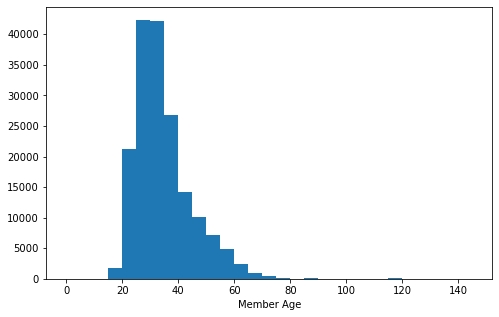

In [19]:
# start with univariate plot
binsize = 5
bins = np.arange(0, biketrip['member_age'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = biketrip, x = 'member_age', bins = bins)
plt.xlabel('Member Age')
plt.show()

> The specital arange of good fitness between 20 to 40 age.


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I create new column `member_age` by calculate between `member_birth_year` min of trip date 2019,

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Of course, need to change some of data like -I need member age to compaire which generation is good fit- by use some calculate of columns.

## Bivariate Exploration

> Here will compire between member gender and duration minute to check which of gender is fit.

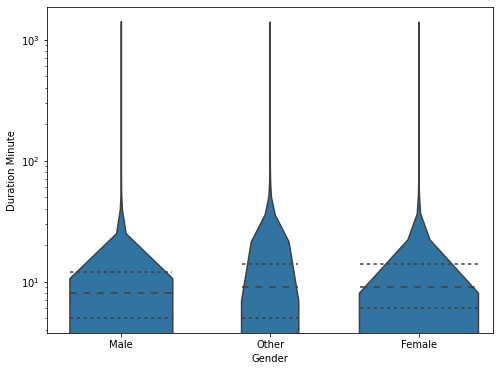

In [20]:
# Bivariate Exploration
plt.figure(figsize = [8, 6])
default_color = sb.color_palette()[0]
sb.violinplot(data = biketrip, x = 'member_gender', y = 'duration_minute', color=default_color, inner='quartile')
plt.xlabel('Gender')
plt.yscale('log')
plt.ylabel('Duration Minute')
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> We think the female gender better than others.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> We think the dataframe on cloumn gender type, there are alot of female gender.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

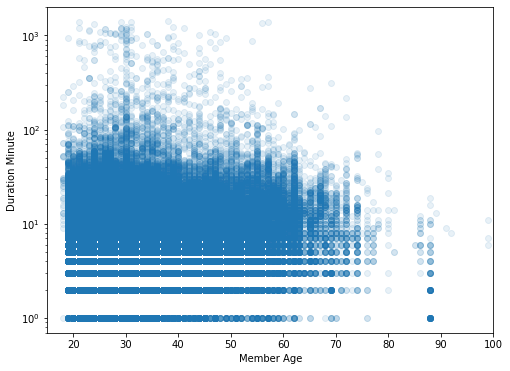

In [21]:
# Multivariate Exploration

plt.figure(figsize = [8, 6])
plt.scatter(data = biketrip, x = 'member_age', y = 'duration_minute', alpha = 1/10)
plt.xlim([15, 100])
plt.xlabel('Member Age')
plt.yscale('log')
plt.ylabel('Duration Minute')
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Here compire between member age with duration minute, there are a lot between 20 and 40 age.

### Were there any interesting or surprising interactions between features?

> Yes, the best fit on 30 age of male.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!